In [0]:
import tensorflow as tf 
tf.test.gpu_device_name()

''

**EDA on Wine Quality**

**1. Problem Statement**

The dataset is used for predicting the quality of wine based on the parameters or ingredients portion in it. 

**2. Importing Packages**

In [0]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [0]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

**3. Loading Data**

In [0]:
import pandas_profiling
import pandas as pd
from pandas_profiling import ProfileReport
csv_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')
csv_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


**Description of the Dataset**

This dataset provides information about the quality of wine based on fixed acidity, volatile acidity, citric acid,	residual sugar,	chlorides,free sulfur dioxide,	total sulfur dioxide,	density,	pH,	sulphates,	
alcohol,	quality.

*   fixed acidity:
most acids involved with wine are fixed or nonvolatile (do not evaporate readily)
*   volatile acidity:
the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

*   citric acid: found in small quantities, citric acid can add ‘freshness’ and flavor to wines
*   residual sugar: the amount of sugar remaining after fermentation stops

*   chlorides: the amount of salt in the wine
*   free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisul-fite ion; it prevents microbial growth and the oxidation of wine


*   total sulfur dioxide: amount of free and bound forms of S02
*   density: the density of water is close to that of water depending on the percent alcohol and sugar con-tent


*   pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
*   sulphates: plays an important role in preventing oxidization and maintaining a wine's freshness.



*   alcohol: the percent alcohol content of the wine
*   quality: output variable












    






**Pandas Profiling before Data Preprocessing**

In [0]:
pandas_profiling.ProfileReport(csv_df)

Number of variables,12
Number of observations,6497
Total Missing (%),0.0%
Total size in memory,609.2 KiB
Average record size in memory,96.0 B
Numeric,12
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


**Observations**

Dataset info:

Number of variables: 12 Number of observations: 6497 Missing cells: 0 (0.00%) Variables types:

Numeric = 12 Categorical = 0 Boolean = 0 Text (Unique) = 0 Rejected = 0

*   Fixed acidity is hight cardinal with 106 distinct values.
*   Volatile acidity is hight cardinal with 187 distinct values.
*   Citric acid has kurtosis is very high (2.3972) and skewness is 0.47173.
*   Residual sugar is highly cardinal with 316 distinct values.
*   Chlorides is highly cardinal with 214 distinct values.
*   Chlorides has kurtosis is very high (50.898) and skewness is 5.3998, hence there is an outier.
*   Total sulfur dioxide is highly cardinal with 276 distinct values.
*   Density is very highly cardinal with 998 distint values.
*   for pH the maximun value is 4.01 and Q3 (75th quartile range) is 3.5
*   For sulpahtes is positive skewed as mean (0.53) lies to the right of median (0.51).
*   Alcohol has 111 distinct values.
*   from the correlation model we see that, free sulfur dioxide and total sulfur dioxide are highly correlated with each other.
*   from the correlation model we see that, alcohol and quality are highly correlated with eachother.
*   Alcohol and density are negatively correlated with eachther. 



















**Data Preprocessing**

Run dataset again to avoid errors.

In [0]:
csv_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5




*   check if any columns have null values.




In [0]:
csv_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64



*   check the columns for datatype and non null values.




In [0]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 609.2 KB




*   Let's make our own column for quality by grouping the quality column into poor, medium and good quality.  




In [0]:
# Good   = [8,9]
# Medium = [5,6,7]
# Poor   = [3,4]

csv_df['overall'] = csv_df['quality'].apply(lambda x : 
                                                      'Poor' if x < 5 else 'Medium' if x < 8 else 'Good' )
csv_df.overall = csv_df.overall.astype('category')



*   run the dataset again.




In [0]:
csv_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000




*   check the datatypes of each column after adding new column(overall).




In [0]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
overall                 6497 non-null category
dtypes: category(1), float64(11), int64(1)
memory usage: 615.7 KB




*   From profiling we saw there are outliers in citric acid column. Let's treat them.




In [0]:
def citric(citricacid):                                                    
    if citricacid>=0 and citricacid<=1:                                             
        return citricacid
    else:
        return np.nan
csv_df['acid'] = csv_df['citric acid'].apply(citric)

print("acid")                                                          
print("Minimum value: ", csv_df["acid"].min())
print("Maximum value: ", csv_df["acid"].max())
print("How many values are NaN?: ", pd.isnull(csv_df['acid']).sum())
print("Frequency table for pos_of_axillary_nodes:")
csv_df["acid"].value_counts().sort_index(0)

acid
Minimum value:  0.0
Maximum value:  1.0
How many values are NaN?:  2
Frequency table for pos_of_axillary_nodes:


0.00    151
0.01    40 
0.02    56 
0.03    32 
0.04    41 
        .. 
0.86    1  
0.88    1  
0.91    2  
0.99    1  
1.00    6  
Name: acid, Length: 87, dtype: int64



*  From profiling we saw there are outliers in chlorides column. Let's treat them.




In [0]:
def Chlorides(chlorides):                                                    
    if chlorides>=0.0 and chlorides<=0.3:                                             
        return chlorides
    else:
        return np.nan
csv_df['Chlorides1'] = csv_df['chlorides'].apply(Chlorides)

print("Chlorides1")                                                          
print("Minimum value: ", csv_df["Chlorides1"].min())
print("Maximum value: ", csv_df["Chlorides1"].max())
print("How many values are NaN?: ", pd.isnull(csv_df['Chlorides1']).sum())
print("Frequency table for pos_of_axillary_nodes:")
csv_df["Chlorides1"].value_counts().sort_index(0)

Chlorides1
Minimum value:  0.009000000000000001
Maximum value:  0.29
How many values are NaN?:  24
Frequency table for pos_of_axillary_nodes:


0.009    1
0.012    3
0.013    1
0.014    4
0.015    4
        ..
0.263    1
0.267    1
0.270    1
0.271    1
0.290    1
Name: Chlorides1, Length: 193, dtype: int64

**Pandas Profiling after data processing**

In [0]:
import pandas_profiling
import pandas as pd
csv_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')
csv_df
pandas_profiling.ProfileReport(csv_df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,6497
Total Missing (%),0.0%
Total size in memory,609.2 KiB
Average record size in memory,96.0 B
Numeric,12
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


**Exploratory Data Analysis**

**Ananlyze the relation between every column using pair plot**

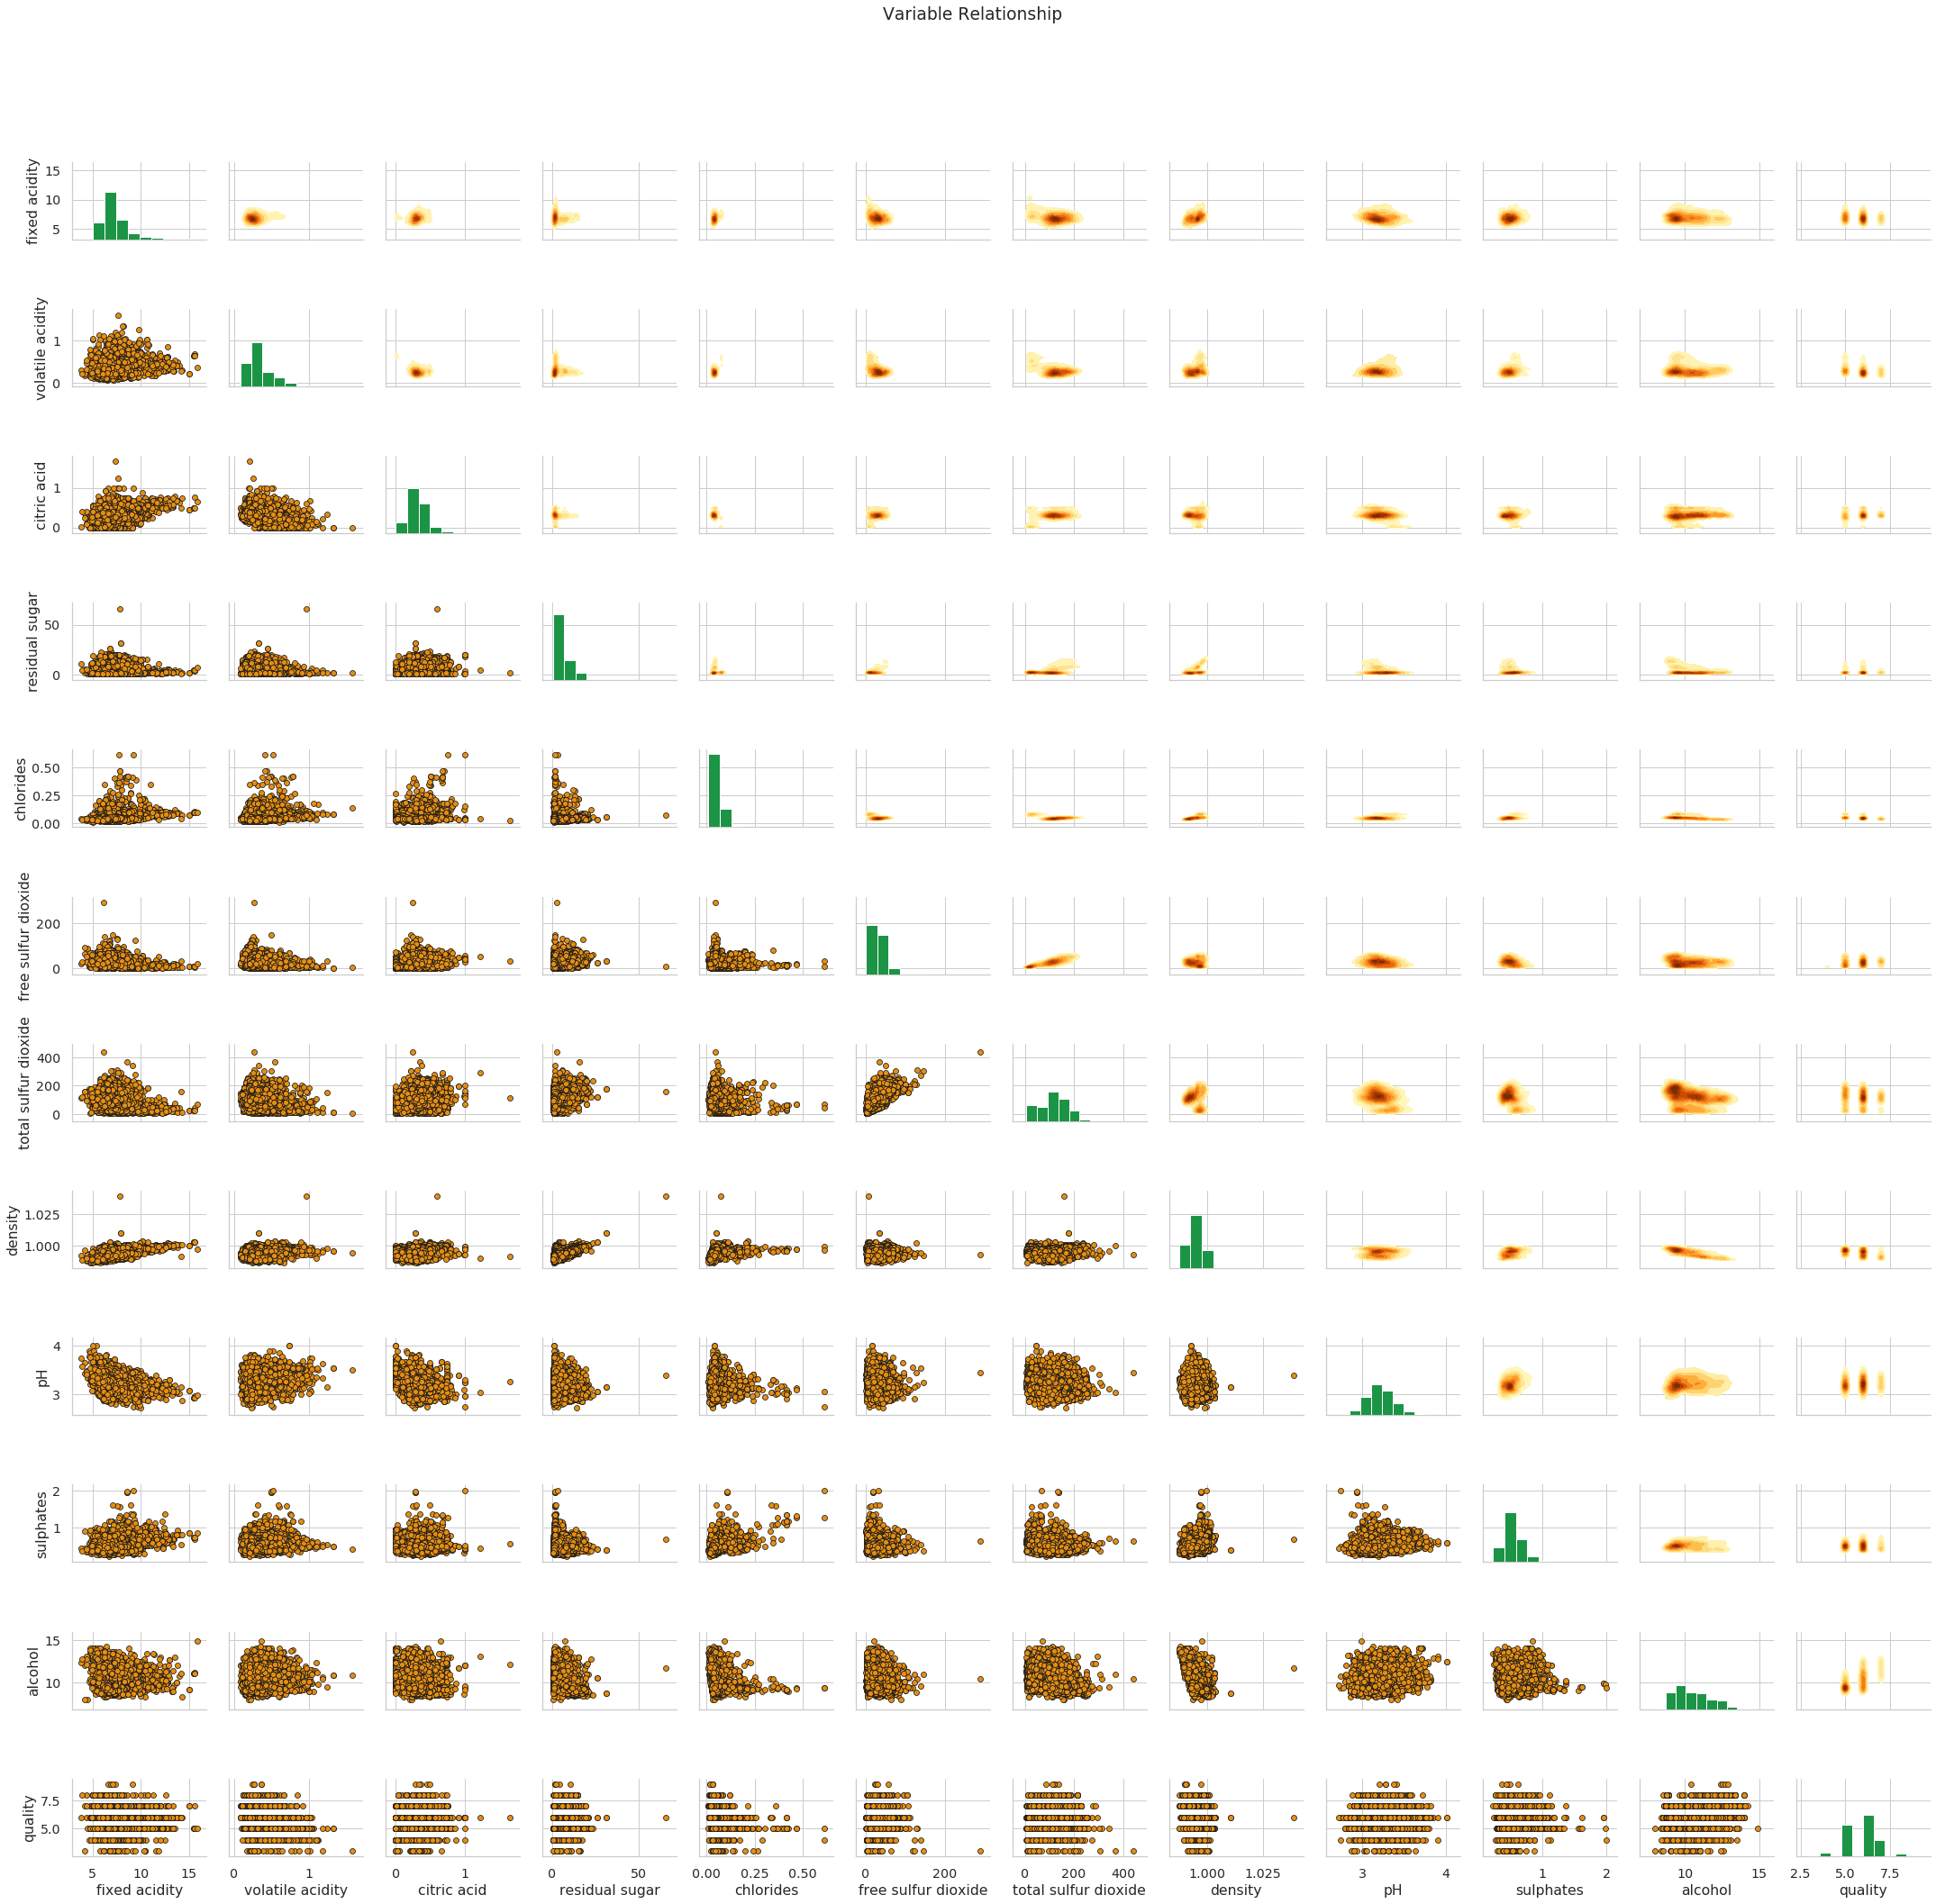

In [0]:
g = sns.PairGrid(csv_df)
g = g.map_upper(sns.kdeplot, cmap = 'YlOrBr', shade = True, shade_lowest = False)     #KDE
g = g.map_diag(plt.hist, color = '#1c9446')                                           #Histogram
g = g.map_lower(sns.scatterplot, color='#e68e12', edgecolor = 'k')                    #Scatter

g.fig.tight_layout()
plt.subplots_adjust(top=0.9, hspace=0.9)
g.fig.suptitle('Variable Relationship')
plt.show()

**Observations**

*   Above pairplot shows the relationship among various features for all the possible pair of features.



**Analyze the quality count using box plot**

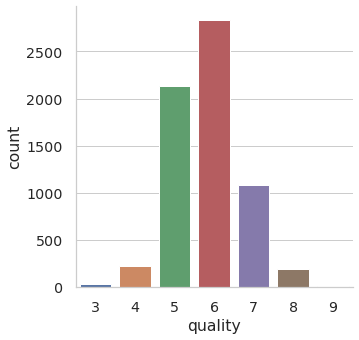

In [0]:
sns.catplot(x='quality',data=csv_df, kind='count')

**Observations**

*   'quality' has a high number of values in categories 5, 6 and 7.
*   Only a few observations are there for the categories 3, 4 & 8.



**Analyze the relation between density and alcohol**

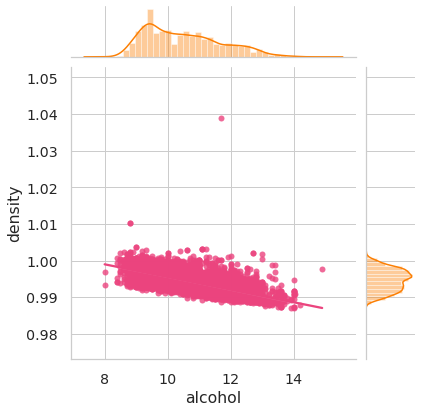

In [0]:
g = sns.JointGrid(x='alcohol', y='density', data=csv_df)
g = g.plot_joint(sns.regplot, color='#eb447e')
g = g.plot_marginals(sns.distplot, color='#fc7f03')

**Observations**

*   We can observe that there is slight decrease in density as alcohol content increases.
*   We see that density range from 0.99 to 1 for alcohol content between 9-13.



**To understand the correlation between each elements**

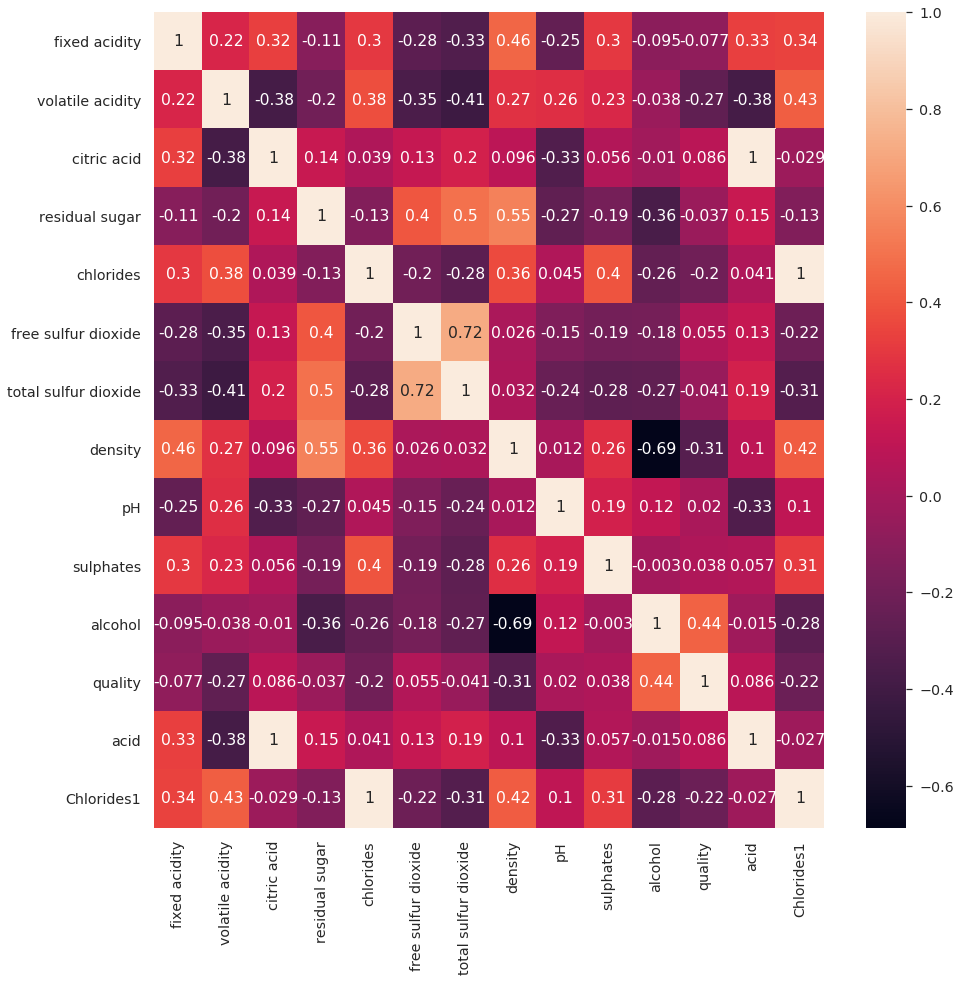

In [0]:
plt.figure(figsize=(15,15));
sns.heatmap(csv_df.corr(),color="k", annot=True)

**Observation**

*   density has a strong positive correlation with residual sugar, whereas it has a strong negative correlation with alcohol.
*   pH & fixed acidity has negative correlation.
*   density & fixed acidity has positive correlation.
*   citric acid & fixed acidity has positive correlation.
*   citric acid & volatile acidity has negative correlation.
*   free sulphur dioxide & total sulphur dioxide has positive correlation.









*  As the data is large lets draw a facetgrid for columns quality, overall values.  




In [0]:
facet_grid_df = pd.melt(csv_df, id_vars=['quality','overall'], value_vars=csv_df.columns[:11], var_name='variable', value_name='value')
facet_grid_df.sort_values(by=['variable','quality'], ascending=[True,True], inplace=True)
facet_grid_df.reset_index(drop=True, inplace=True)
facet_grid_df.quality = facet_grid_df.quality.astype('str')
facet_grid_df.quality = facet_grid_df.quality.astype('category')
facet_grid_df.head(3)

,quality,overall,variable,value
0,3,Poor,alcohol,9.0
1,3,Poor,alcohol,8.4
2,3,Poor,alcohol,10.7


**To analyze wine quality based on all variables we draw violin plot**

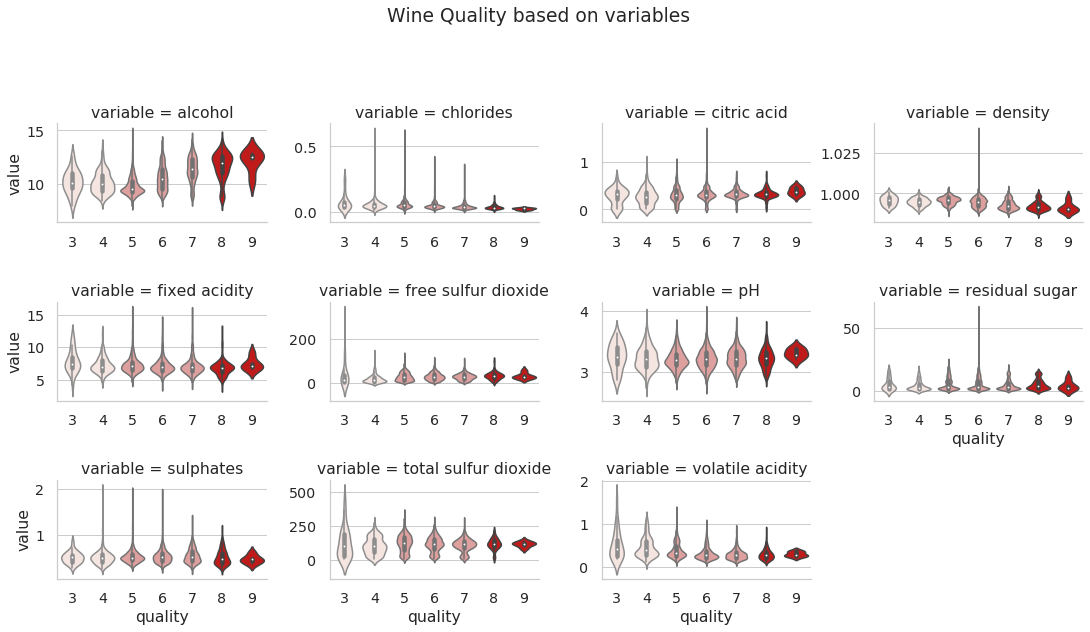

In [0]:
g = sns.FacetGrid(facet_grid_df, col='variable', col_wrap=4, hue='overall', palette={'Poor':'#F7E3DE', 'Medium':'#E99494', 'Good':'#DB0000'}, 
                  sharey=False, sharex=False, height=3, aspect=1.3, legend_out=True, hue_order=['Poor','Medium','Good'])
g.map(sns.violinplot, 'quality', 'value', order=['3', '4', '5', '6', '7', '8', '9'])

g.fig.tight_layout()
plt.subplots_adjust(top=0.8, hspace=0.8)
g.fig.suptitle('Wine Quality based on variables')
legend = ['Poor','Medium','Good']
plt.show()



*   From the above violin plot we observe that there are outliers in all the variables. 
*   Hence we will clean that data by reshaping the dataframe and dropping rows below 1% and above 99% quantile.



In [0]:
corrected_melt = pd.melt(csv_df, id_vars=['quality','overall'], value_vars=csv_df.columns[:11], var_name='variable', value_name='value')
corrected_melt.sort_values(by=['variable','quality'], ascending=[True,True], inplace=True)
corrected_melt.reset_index(drop=True, inplace=True)
corrected_melt.quality = facet_grid_df.quality.astype('str')
corrected_melt.quality = facet_grid_df.quality.astype('category')
corrected_melt.head(3)

,quality,overall,variable,value
0,3,Poor,alcohol,9.0
1,3,Poor,alcohol,8.4
2,3,Poor,alcohol,10.7


In [0]:
# Create 1% quantile data
p01 = corrected_melt.groupby(['quality','variable'], as_index=False)[['value']].quantile(.01)
p01.rename(columns={'value':'1%'}, inplace=True)

# Create 99% quantile data
p99 = corrected_melt.groupby(['quality','variable'], as_index=False)[['value']].quantile(.99)
p99.rename(columns={'value':'99%'}, inplace=True)

# Merge both columns
corrected_df = corrected_melt.merge(p01, on=['quality','variable']).merge(p99, on=['quality','variable'])

# A function to create columns for 1% and 99% quantile data
def corrected_value(value,one,ninenine) : 
  if (value >=one) and (value <=ninenine) : 
    return value
  else :  
    return np.NaN

# Apply the function
corrected_df['corrected value'] = corrected_df.apply(lambda x: corrected_value(x['value'], x['1%'], x['99%']), axis=1)
corrected_df.dropna(axis=0, how='any', inplace=True)

**Plot violin plot again after cleaning for corrected data**

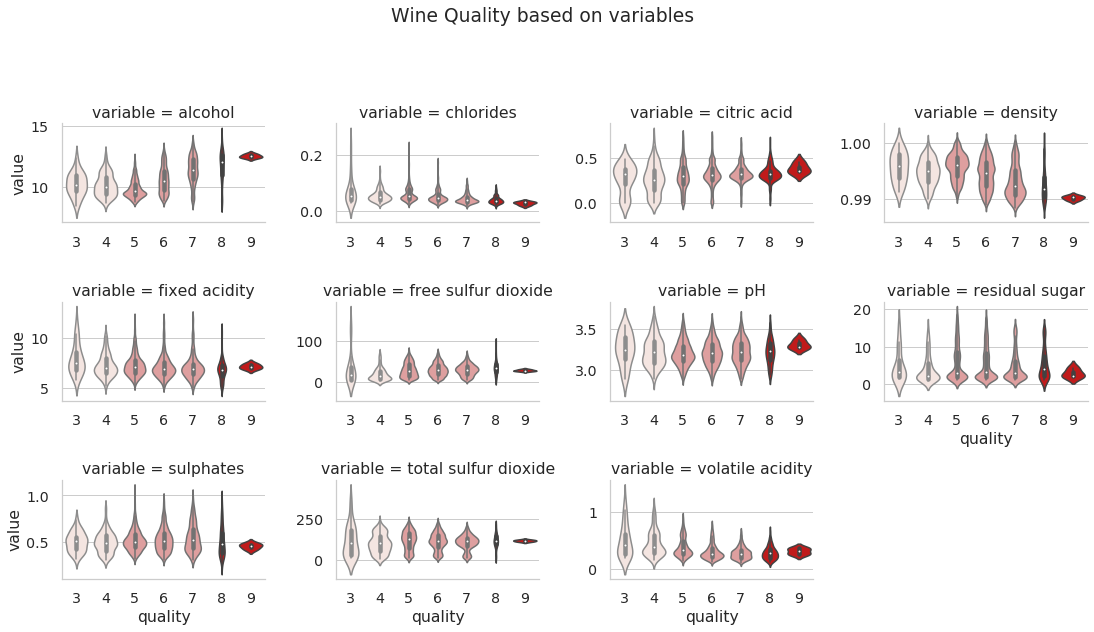

In [0]:
g = sns.FacetGrid(corrected_df, col='variable', col_wrap=4, hue='overall', palette={'Poor':'#F7E3DE', 'Medium':'#E99494', 'Good':'#DB0000'}, 
                  sharey=False, sharex=False, height=3, aspect=1.3, legend_out=True, hue_order=['Poor','Medium','Good'])
g.map(sns.violinplot, 'quality', 'value', order=['3', '4', '5', '6', '7', '8', '9'])

g.fig.tight_layout()
plt.subplots_adjust(top=0.8, hspace=0.8)
g.fig.suptitle('Wine Quality based on variables')
legend = ['Poor','Medium','Good']
plt.show()

**Analyze overall wine quality based on different variables**

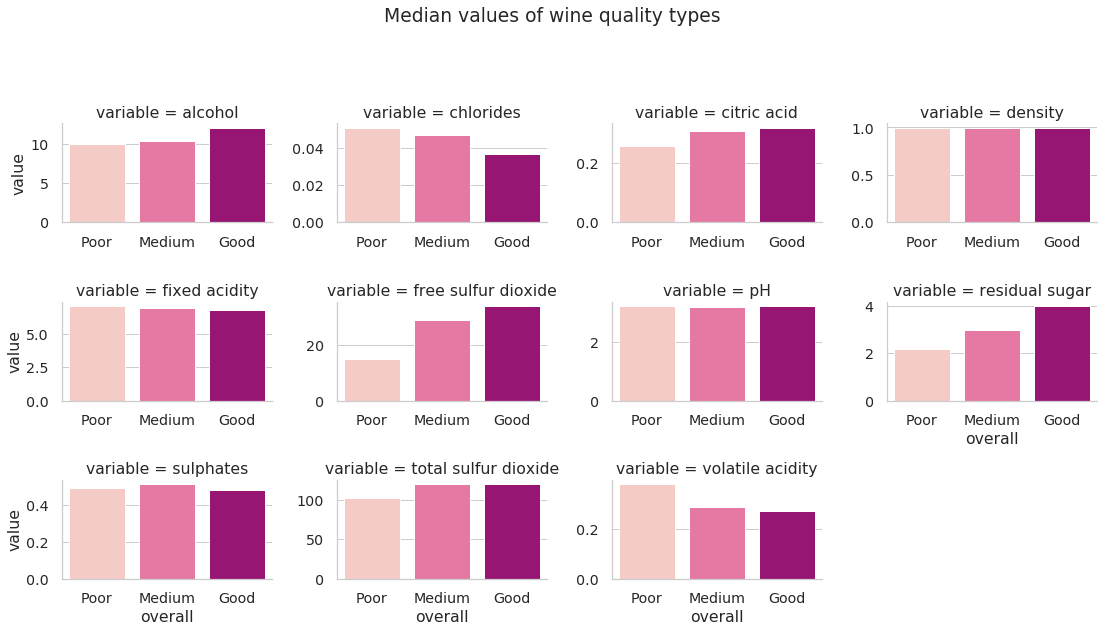

In [0]:
d = corrected_df.groupby(['variable','overall'], as_index=False)[['value']].median()

g = sns.FacetGrid(d, col='variable', col_wrap=4, sharey=False, sharex=False, height=3, aspect=1.3, legend_out=True, 
                  hue='overall', hue_order=['Poor','Medium','Good'],palette='RdPu')
g.map(sns.barplot, 'overall', 'value', order=['Poor','Medium','Good'])

g.fig.tight_layout()
plt.subplots_adjust(top=0.8, hspace=0.8)
g.fig.suptitle('Median values of wine quality types')
plt.show()

**Summary**   

*   As alcohol level increase ==> Quality increases
*   As chlorides level decreases ==> Quality increases
*   As citric acid level increases ==> Quality increases
*   fixed acidity ==> can’t say impact on Quality
*   As free sulfur dioxide increases ==> Quality increases
*   As density decreases ==> Quality increases
*   pH ==> can’t say impact on Quality
*   As residual sugar increases ==> Quality increases
*   sulphates ==> can’t say impact on Quality
*   total sulfur dioxide ==> can’t say impact on Quality
*   As the volatile acidity decreases ==> Quality increases



